## Import packages

In [1]:
from vitrum.glass_Atoms import glass_Atoms
from vitrum.scattering import scattering

from ase.io import read
import matplotlib.pyplot as plt


## Load data

In [2]:
atoms = read("md.lammpstrj", index=":10" , format="lammps-dump-text")

In [3]:
corr_atoms_dic = {1: 'Na', 2: 'O', 3:'Si'}

for atom in atoms:
    corr_symbols = [corr_atoms_dic[i] for i in atom.get_atomic_numbers()]
    atom.set_chemical_symbols(corr_symbols)

## S(Q)

In [4]:
sc = scattering(atoms, rrange=15, qrange=30, nbin = 500)
sq = sc.get_structure_factor(type="neutron")

100%|██████████| 10/10 [00:02<00:00,  3.35it/s]


Text(0, 0.5, 'S(Q)')

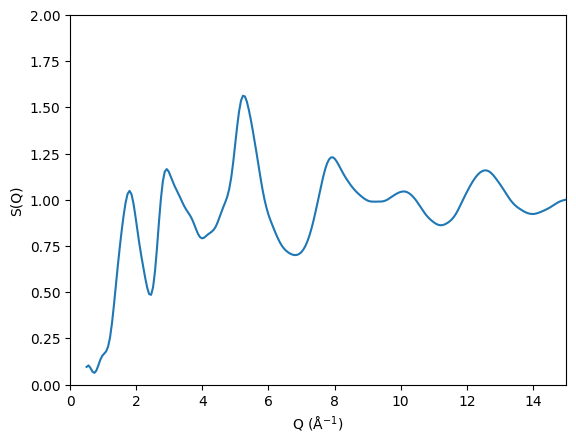

In [5]:
plt.plot(sc.qval, sq)
plt.xlim(0,15)
plt.ylim(0,2)
plt.xlabel("Q (Å$^{-1}$)")
plt.ylabel("S(Q)")

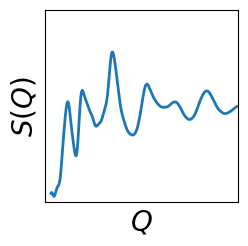

In [32]:
plt.figure(figsize=(2.5,2.5))
plt.plot(sc.qval, sq, linewidth=2)
plt.xlim(0,15)
plt.ylim(0,2)
plt.xlabel("$\it{Q}$", fontsize=20)
plt.ylabel("$\it{S}$($\it{Q}$)", fontsize=20)
#remove tick marks
plt.xticks([])
plt.yticks([])
plt.savefig("sq.svg", bbox_inches="tight")

## g(r)

In [12]:
rdf = sc.get_partial_pdf(('Na', 'O'))

Text(0, 0.5, 'g(r)')

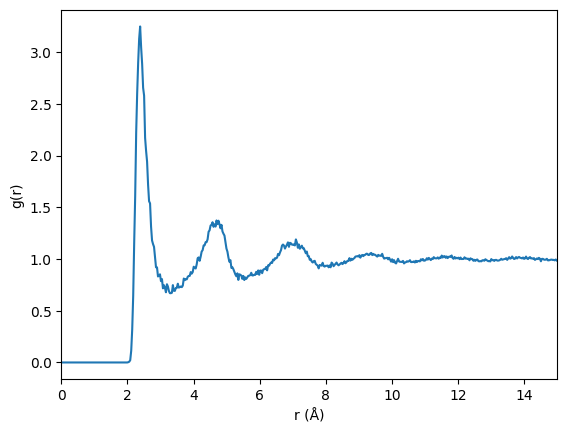

In [13]:
plt.plot(sc.xval, rdf)
plt.xlim(0,15)

plt.xlabel("r (Å)")
plt.ylabel("g(r)")

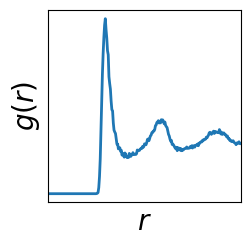

In [33]:
plt.figure(figsize=(2.5,2.5))
plt.plot(sc.xval, rdf, linewidth=2)
plt.xlim(0,8)

plt.xlabel("$\it{r}$", fontsize=20)
plt.ylabel("$\it{g}$($\it{r}$)", fontsize=20)
#remove tick marks
plt.xticks([])
plt.yticks([])
plt.savefig("gr.svg", bbox_inches="tight")

## Qn

In [1]:
from collections import Counter
Counter(atoms[0].NBO_analysis('Si', 'O', ['Si'], cutoff = 2))

Counter({3: 339, 4: 238, 2: 109, 1: 13, 0: 1})

## Generating random structures

In [ ]:
from vitrum.utility import get_random_packed
atoms = get_random_packed(("LiFePO4", density=3, target_atoms=200, minAllowDis=1.5, mp_api_key=None, datatype="ase", seed=None))
